<a href="https://colab.research.google.com/github/luthra2059/Image-Data-Augmentation-with-Keras/blob/master/Image_Data_Agumentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline

In [67]:
import os
import numpy as np
import tensorflow as tf
from PIL import Image
from matplotlib import pyplot as plt

print('Using Tensorflow', tf.__version__)

Using Tensorflow 2.2.0


In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 40
)

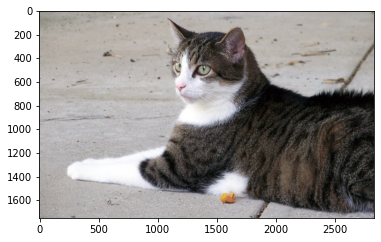

In [69]:
image_path = 'drive/My Drive/images/cat/cat.jpg'
plt.imshow(plt.imread(image_path))

Found 1 images belonging to 1 classes.


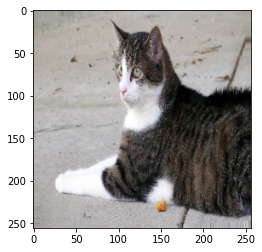

In [70]:
x, y = next(generator.flow_from_directory('drive/My Drive/images/', batch_size=1))
plt.imshow(x[0].astype('uint8'))

In [0]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range = [-100, -50, 0, 50, 100],
    height_shift_range = [-50,0 ,50]
)

Found 1 images belonging to 1 classes.


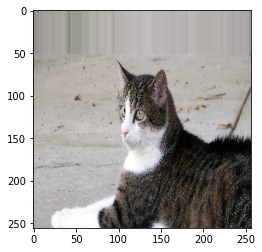

In [72]:
x, y = next(generator.flow_from_directory('drive/My Drive/images/', batch_size=1))
plt.imshow(x[0].astype('uint8'))

Found 1 images belonging to 1 classes.


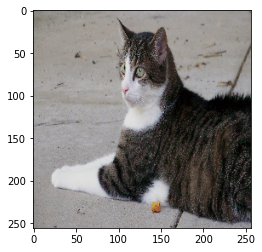

In [73]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    brightness_range = (0.5, 2.)
)
x, y = next(generator.flow_from_directory('drive/My Drive/images/', batch_size=1))
plt.imshow(x[0].astype('uint8'))

Found 1 images belonging to 1 classes.


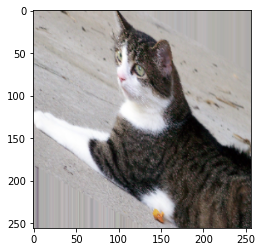

In [74]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    shear_range = 40
)
x, y = next(generator.flow_from_directory('drive/My Drive/images/', batch_size=1))
plt.imshow(x[0].astype('uint8'))

Found 1 images belonging to 1 classes.


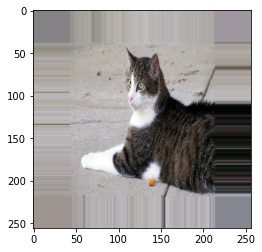

In [75]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range = 0.5
)
x, y = next(generator.flow_from_directory('drive/My Drive/images/', batch_size=1))
plt.imshow(x[0].astype('uint8'))

Found 1 images belonging to 1 classes.


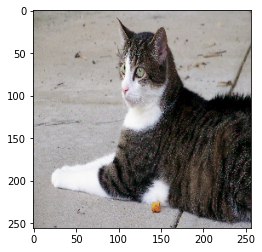

In [78]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    channel_shift_range = 100
)
x, y = next(generator.flow_from_directory('drive/My Drive/images/', batch_size=1))
plt.imshow(x[0].astype('uint8'))

In [79]:
x.mean()

130.31865

In [80]:
np.array(Image.open(image_path)).mean()

136.269391360573

Found 1 images belonging to 1 classes.


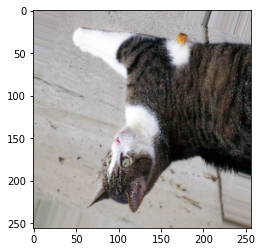

In [81]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = True,
    rotation_range = 30
)
x, y = next(generator.flow_from_directory('drive/My Drive/images/', batch_size=1))
plt.imshow(x[0].astype('uint8'))

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center = True,
    featurewise_std_normalization = True
)
generator.fit(x_train)

In [83]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

0.28370827 0.6881349 [[5]]
120.70756512369792


In [84]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    samplewise_center = True,
    samplewise_std_normalization = True
)
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

1.9868216e-08 1.0 [[5]]


In [85]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1.,
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input
)
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

-0.36441478 0.28009593 [[3]]


In [89]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input,
    horizontal_flip = True,
    rotation_range = 20
)
model = tf.keras.models.Sequential([
      tf.keras.applications.mobilenet_v2.MobileNetV2(
          include_top = False,
          input_shape=(32, 32, 3),
          pooling = 'avg'
      ),
      tf.keras.layers.Dense(10, activation = 'softmax')
])
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)
_ = model.fit(
    generator.flow(x_train, y_train, batch_size = 32),
    epochs = 1, steps_per_epoch = 10
)

10/10 [==============================] - 2s 222ms/step - loss: 3.1467 - accuracy: 0.1063
